In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.fft as npf
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools.projectC as im
import pywt
from numpy.linalg import inv

%matplotlib notebook

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


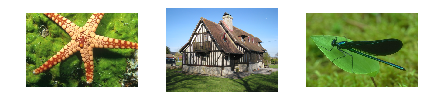

In [3]:
x0=plt.imread('assets/starfish.png')
y=plt.imread('assets/normandy.png')
z=plt.imread('assets/dragonfly.png')
fig, axes = plt.subplots(ncols=3)
im.show(x0, ax=axes[0])
im.show(y, ax=axes[1])
im.show(z, ax=axes[2])

Text(0.5, 1.0, 'Its wavelet Coefficient')

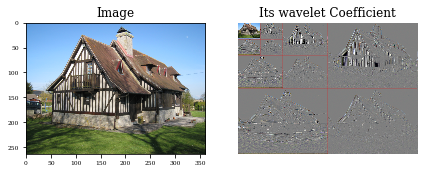

In [4]:
#Q7,8 : Implement DWT function and display
x0=plt.imread('assets/normandy.png')
h,g = im.wavelet('db2')
J=3
x= im.dtw_crop(x0,J)        # Crop x to size of DWT, J=3
z_dwt= im.dwt(x,J,h,g)         # dwt of x

fig, axs = plt.subplots(ncols=2)
axs[0].imshow(x)
axs[0].set_title('Image')
im.showdwt(z_dwt, J)
axs[1].set_title('Its wavelet Coefficient')


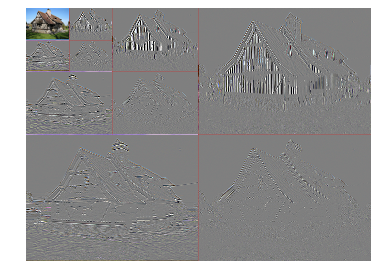

In [5]:
#Q9: Implement IDWT function :
    # Solved in ProjetC.py
plt.figure()
im.showdwt(z_dwt,J)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


** Display shows that the proof correctly


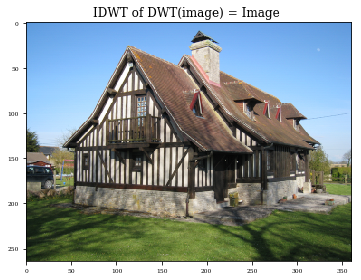

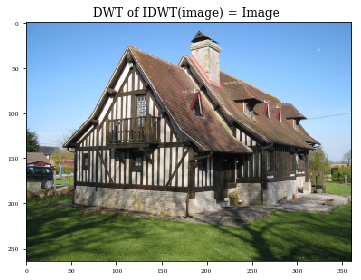

In [6]:
# Q10: Check DWT and IDWT vs Inverse version
    # DWT -> IDWT:
z_dwt= im.dwt(x,J,h,g) 
z_idwt = im.idwt(z_dwt,J,h,g)

fig, axs = plt.subplots()
axs.imshow(z_idwt)
axs.set_title('IDWT of DWT(image) = Image ')

     # IDWT -> DWT
x_idwt = im.idwt(x,J,h,g)
x= im.dwt(x_idwt,J,h,g) 
fig, axs = plt.subplots()
axs.imshow(x)
axs.set_title('DWT of IDWT(image) = Image ')
print('** Display shows that the proof correctly')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


** Invert() show the proof correctly
(270, 360, 3)
(264, 360, 3)
(264, 360, 1)
** np.isclose(p,p1)=True, shows that power(self) was implemented correctly to match with dwt_power(n1,n2,J)


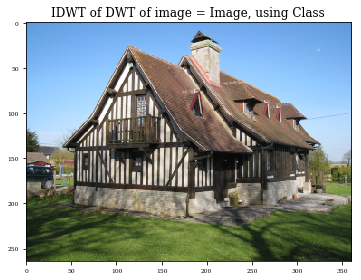

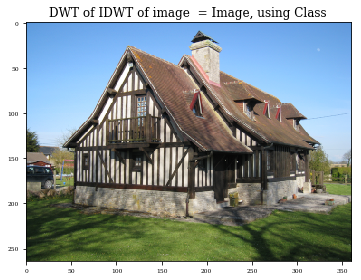

In [14]:
#Q11: Implement Invert() , Power(), use Class DWT :
    # DWT -> IDWT
x0=plt.imread('assets/normandy.png')
x=im.dtw_crop(x0,J)
W= im.DWT(x.shape,J, name='db2')  # Call Object W from class DWT
z_dwt = W.__call__(x0)                # Take DWT
x_idwt = W.invert(z_dwt)              # Take IDWT

fig, axs = plt.subplots()
axs.imshow(x_idwt)
axs.set_title('IDWT of DWT of image = Image, using Class')

        # DWT -> IDWT  
x_idwt = W.invert(x0)              # Take IDWT
x = W.__call__(x_idwt)             # Take DWT
fig, axs = plt.subplots()
axs.imshow(x)
axs.set_title('DWT of IDWT of image  = Image, using Class')

print('** Invert() show the proof correctly')

    # Check if Power(self) = dwt_power(n1,n2,J)
print(x0.shape)
x=im.dtw_crop(x0,J)
print(x.shape)
n1,n2= x.shape[:2]
p1= im.dwt_power(n1,n2,J,)
p= W.power()
print(p.shape)
#print(p1.shape)
#print(p[:,0])

np.isclose(p,p1)
print('** np.isclose(p,p1)=True, shows that power(self) was implemented correctly to match with dwt_power(n1,n2,J)')


In [8]:
# Q12: Thresholding ( refer to ProjectC.py)


(320, 480, 3)


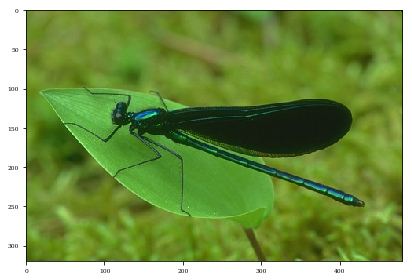

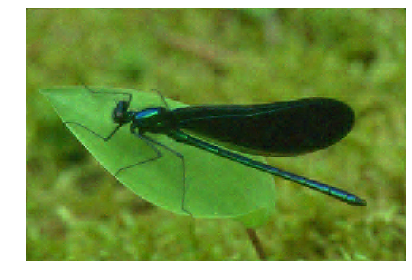

In [10]:
# Q13: Denoise 
sig= 20/255
x0=plt.imread('assets/dragonfly.png')
x0= im.dtw_crop(x0,J)
y_noise= x0 + sig * np.random.randn(*x0.shape)
W= im.DWT(y_noise.shape,J, name='db2')             # Call Object W from class DWT

y_denoise = im.softthresh_denoise(y_noise, sig, W, alpha=10/255)
plt.figure()
im.show(y_denoise)
print(x0.shape)
#plt.figure()
#im.show(y_noise)

Text(0, 0.5, 'PSNR')

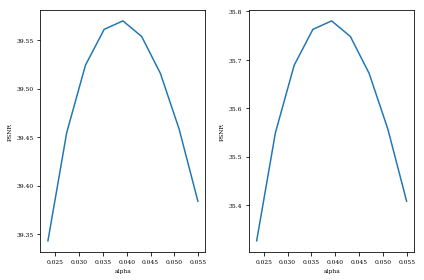

In [13]:
#Q14: Calculate PSNR
def PSNR(noise, denoise):
    mse = np.mean((noise - denoise) ** 2 )
    PIXEL_MAX = 255
    return  10 * np.log10(PIXEL_MAX / np.sqrt(mse))
    #return 10 * np.log10(PIXEL_MAX**2 /(mse))

def psnr1(x, x0):                    # Psnr method from assignment 4
    R = (255 if np.any(x>1) else 1)
    den = ((x.flatten() - x0.flatten())**2).mean()
    snr = 10*np.log(R**2/den, 10)
    return snr

k=9
psnr= np.zeros(k)
Psnr= np.zeros(k)
alpha= np.zeros(k)

for i in range(k):
    y_denoise= im.softthresh_denoise(y_noise, sig, W, alpha=(6+i)/255)
    psnr[i] = PSNR(x0,y_denoise)
    Psnr[i]= im.psnr(y_denoise,x0)
    alpha[i] = (6+i)/255
    
fig, axs = plt.subplots(ncols=2)
axs[0].plot(alpha,psnr)
axs[0].set_xlabel('alpha')
axs[0].set_ylabel('PSNR')
axs[1].plot(alpha,Psnr)
axs[1].set_xlabel('alpha')
axs[1].set_ylabel('PSNR')






In [ ]:
for i in range(1,4):
    print(i)